<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Receiver Operator Characteristic

In [1]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

In [2]:
#======= set default plotting properties =======
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import rc
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.color'] = 'b'
plt.rcParams['figure.figsize'] = 7, 4.5 # default figure size
rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})

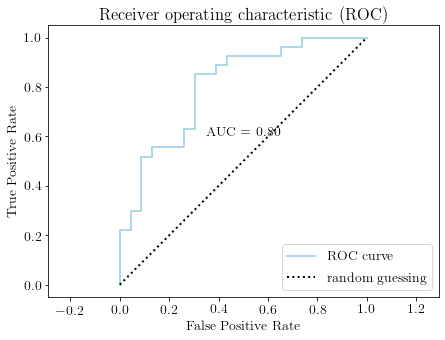

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=123)

# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)



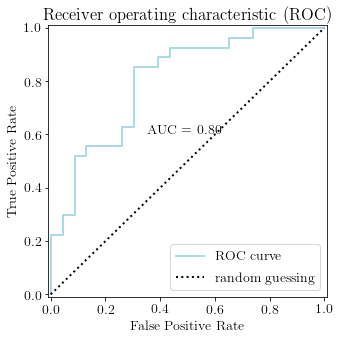

In [12]:
# Plot ROC curve

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='dotted', label='random guessing')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
# plt.xlim([0,1])
# plt.ylim([-0.01,1.01])
plt.legend(loc="lower right")
ax.annotate('AUC = %0.2f' %roc_auc, xy=(0.35, 0.6))
plt.savefig('Outputs/ROCplot.pdf')
plt.show()